In [1]:
import requests

import warnings
warnings.filterwarnings("ignore")

from Fantasy import Fantasy

url = 'https://fantasy.allsvenskan.se/api/bootstrap-static/'
response = requests.get(url)
json = response.json()


In [2]:
unwanted_teams = []

higher_than_zero = ['value_season', 'minutes']

fal = Fantasy(json, unwanted_teams, higher_than_zero)

In [3]:
fal.getPlayerDf()

,second_name,team,element_type,now_cost,minutes,value_season,total_points,form,value_form
0,Dahlin,Malmö FF,Målvakt,60,1665.0,16.3,98,0.0,0.0
1,Diawara,Malmö FF,Målvakt,45,1395.0,16.2,73,0.0,0.0
2,Moisander,Malmö FF,Försvarare,60,607.0,5.8,35,0.0,0.0
3,Knudsen,Malmö FF,Försvarare,60,1039.0,6.8,41,0.0,0.0
4,Nielsen,Malmö FF,Försvarare,55,1482.0,14.2,78,0.0,0.0
...,...,...,...,...,...,...,...,...,...
394,Rajamohan,Degerfors IF,Mittfältare,45,68.0,2.0,9,0.0,0.0
395,Salmon,Degerfors IF,Mittfältare,45,367.0,2.9,13,0.0,0.0
396,Krezic,Degerfors IF,Mittfältare,50,24.0,0.2,1,0.0,0.0
397,Djurdjic,Degerfors IF,Anfallare,60,724.0,4.8,29,0.0,0.0


# Aggregate

In [4]:
# Avg value per position
fal.createPivot('element_type', 'value_season').head()

,element_type,value_season
1,Försvarare,11.829885
3,Målvakt,11.040000
2,Mittfältare,9.238938
0,Anfallare,8.390000


In [5]:
# Avg value per team
fal.createPivot('team', 'value_season').head()

,team,value_season
10,IFK Värnamo,13.500000
5,Hammarby,12.442857
0,AIK,12.218750
3,Djurgården,12.127778
8,IFK Göteborg,10.794118


In [6]:
# Avg form per team
fal.createPivot('team', 'form').head()

KeyError: 'form'

# Top players overall

In [7]:
# Sorting by value season
fal.getPlayerDf().sort_values('value_season', ascending=False).head(10)

,second_name,team,element_type,now_cost,minutes,value_season,total_points,form,value_form
109,Nilsson,Hammarby,Mittfältare,65,2399.0,25.5,166,0.0,0.0
203,Hodzic,BK Häcken,Försvarare,60,2495.0,24.8,149,0.0,0.0
331,Stanisic,Varbergs BoIS,Försvarare,50,2045.0,24.4,122,0.0,0.0
108,Kurtulus,Hammarby,Försvarare,50,2379.0,24.2,121,0.0,0.0
335,Lindner,Varbergs BoIS,Försvarare,50,2665.0,23.8,119,0.0,0.0
175,Rönning,IF Elfsborg,Målvakt,55,2238.0,22.7,125,0.0,0.0
253,Jansson,IFK Norrköping,Målvakt,55,2700.0,22.5,124,0.0,0.0
235,Käck,Djurgården,Försvarare,60,2520.0,22.2,133,0.0,0.0
157,Jallow,IFK Göteborg,Försvarare,55,2591.0,22.0,121,0.0,0.0
135,Mathisen,IK Sirius,Försvarare,50,2430.0,22.0,110,0.0,0.0


In [9]:
# Sorting by form
fal.getPlayerDf().sort_values('form', ascending=False).head(10)


,second_name,team,element_type,now_cost,minutes,value_season,total_points,form,value_form
0,Dahlin,Malmö FF,Målvakt,60,1665.0,16.3,98,0.0,0.0
296,Jansson,Kalmar FF,Anfallare,60,1195.0,12.8,77,0.0,0.0
279,Lima,IFK Norrköping,Anfallare,50,101.0,2.0,10,0.0,0.0
282,Sätra,Kalmar FF,Försvarare,50,2506.0,20.8,104,0.0,0.0
284,Stenmark,Kalmar FF,Försvarare,45,732.0,7.6,34,0.0,0.0
285,Lindahl,Kalmar FF,Försvarare,50,805.0,11.0,55,0.0,0.0
286,Olsson,Kalmar FF,Försvarare,45,222.0,2.7,12,0.0,0.0
287,Sjöstedt,Kalmar FF,Försvarare,50,1884.0,18.0,90,0.0,0.0
288,Rhöse,Kalmar FF,Försvarare,40,26.0,0.8,3,0.0,0.0
290,Sachpekidis,Kalmar FF,Mittfältare,55,939.0,7.1,39,0.0,0.0


# Top per filtered

In [38]:
column = 'element_type'
element = 'Mittfältare'

In [40]:
# Value
fal.dfFiltered(column, element, 'total_points').head(10)

,second_name,team,element_type,now_cost,minutes,value_season,total_points,form,value_form
245,Eriksson,Djurgården,Mittfältare,110,2700.0,17.5,192,0.0,0.0
297,Berg,Kalmar FF,Mittfältare,90,2597.0,18.6,167,0.0,0.0
109,Nilsson,Hammarby,Mittfältare,65,2399.0,25.5,166,0.0,0.0
163,Sana,IFK Göteborg,Mittfältare,85,2598.0,17.8,151,0.0,0.0
123,Ludwigson,Hammarby,Mittfältare,100,2501.0,14.7,147,0.0,0.0
20,Birmancevic,Malmö FF,Mittfältare,100,1955.0,13.6,136,0.0,0.0
313,Larsson,AIK,Mittfältare,95,2209.0,14.3,136,0.0,0.0
11,Christiansen,Malmö FF,Mittfältare,120,1478.0,10.2,123,0.0,0.0
194,Okkels,IF Elfsborg,Mittfältare,75,2079.0,16.3,122,0.0,0.0
295,Pereira Sipião,Kalmar FF,Mittfältare,60,2564.0,19.8,119,0.0,0.0


In [13]:
# Form
fal.dfFiltered(column, element, 'form').head(10)

,second_name,team,element_type,now_cost,minutes,value_season,total_points,form,value_form
0,Dahlin,Malmö FF,Målvakt,60,1665.0,16.3,98,0.0,0.0
1,Diawara,Malmö FF,Målvakt,45,1395.0,16.2,73,0.0,0.0
380,Gal,Degerfors IF,Målvakt,40,360.0,5.8,23,0.0,0.0
356,Brolin,Mjällby AIF,Målvakt,50,900.0,8.8,44,0.0,0.0
325,Mårtensson,Varbergs BoIS,Målvakt,40,537.0,5.8,23,0.0,0.0
304,Nordfeldt,AIK,Målvakt,60,1260.0,9.7,58,0.0,0.0
303,Janosevic,AIK,Målvakt,45,1440.0,16.9,76,0.0,0.0
253,Jansson,IFK Norrköping,Målvakt,55,2700.0,22.5,124,0.0,0.0
229,Widell Zetterström,Djurgården,Målvakt,55,1710.0,16.4,90,0.0,0.0
228,Vasyutin,Djurgården,Målvakt,55,835.0,8.7,48,0.0,0.0


# Distribution

array([[<AxesSubplot:title={'center':'value_season'}>]], dtype=object)

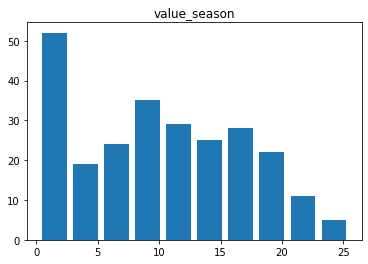

In [15]:
# Getting a feeling for distribution
fal.getPlayerDf().hist(column='value_season', bins=10, grid=False, rwidth=.8)
# fal.getPlayerDf().hist(column='form', bins=10, grid=False, rwidth=.8)
# fal.getPlayerDf().hist(column='value_form', bins=10, grid=False, rwidth=.8)